### IMPORT

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
#from community import community_louvain 
import folium
import random

## MANIPOLAZIONE FILES CSV

In [3]:
df = pd.read_csv('./dataset/treni_modificati.csv') 
df_citta = pd.read_csv('./dataset/df_citta.csv')
df_comuni = pd.read_csv('./dataset/comuni_coordinates.csv')

# CREAZIONE TRENI_SOLO_CITTA.CSV (ARCHI)

colonne_da_tenere = ['stazPart', 'stazArr']
df = df[colonne_da_tenere]

#salva
#df.to_csv('./dataset/treni_solo_citta.csv', index=False)

#CREAZIONE CITTA.CSV (NODI)

# Unisci le due colonne in una singola serie e ottieni i valori unici
df = pd.concat([df['stazPart'], df['stazArr']]).unique()

# Salva
#pd.DataFrame(df, columns=['citta_uniche']).to_csv('./dataset/df_citta.csv', index=False)

#AGGIUNGE LOCATION

colonne_da_tenere = ['DENOMINAZIONE_ITA_ALTRA', 'LAT', 'LON']
df_comuni = df_comuni[colonne_da_tenere]
# Salva 
#df_comuni.to_csv('./dataset/df_comuni.csv', index=False)

# rinomina la colonna per aiutarci in seguito
df_comuni.rename(columns={'DENOMINAZIONE_ITA_ALTRA': 'citta_uniche'}, inplace=True) 
merged_data = pd.merge(df_citta, df_comuni, on='citta_uniche', how='inner') # Merge

# Salva
#pd.DataFrame(merged_data).to_csv('./dataset/merged_data.csv', index=False)


## GRAFO E MISURAZIONI

### LAYOUT DEL GRAFO CHE ABBIAMO DESCRITTO

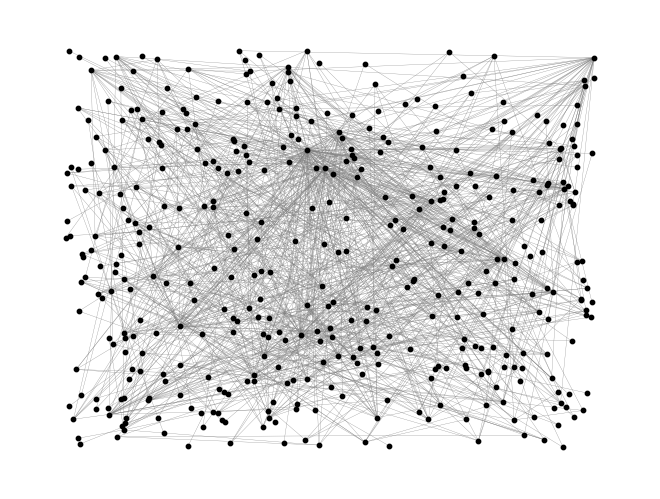

In [4]:
df_citta = pd.read_csv('./dataset/lista_citta_con_stazione.csv')
df_coppie = pd.read_csv('./dataset/treni_solo_citta.csv')


#GRAFO
G = nx.Graph()

# Mappa per evitare SOVRAPPOSIZIONI 
posizioni_usate = {}

for idx, row in df_citta.iterrows():
    # Genera posizione casuale non sovrapposta
    while True:
        x = random.uniform(0, 1)  # Coordinate x casuali tra 0 e 1
        y = random.uniform(0, 1)  # Coordinate y casuali tra 0 e 1
        pos = (x, y)
        if pos not in posizioni_usate.values():
            posizioni_usate[row['citta_uniche']] = pos
            break   
    G.add_node(row['citta_uniche'], pos=pos)

# Aggiungi gli archi--> treni da staPart a stazArr
for idx, row in df_coppie.iterrows():
    G.add_edge(row['stazPart'], row['stazArr'])

G.remove_edges_from(nx.selfloop_edges(G)) #rimozione dei cicli
# Layout grafo
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=False, node_color='black', node_size=10, font_size=4, font_color='black', edge_color='grey', width=0.2)

plt.show()

### MISURAZIONI SUL GRAFO

In [5]:
# Calcolo delle misurazioni di centralità e altre metriche
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
closeness_centrality = nx.closeness_centrality(G)
clustering_coefficient = nx.clustering(G)
density = nx.density(G)

if nx.is_connected(G):
    avg_path_length = nx.average_shortest_path_length(G)
    diameter = nx.diameter(G)
else:
    avg_path_length = None
    diameter = None

connected_components = list(nx.connected_components(G))
connectedness = len(connected_components)

core_number = nx.core_number(G)
assortativity = nx.degree_assortativity_coefficient(G)
bridges = list(nx.bridges(G))

# Stampa delle metriche
print("Degree Centrality:", degree_centrality)
print("Betweenness Centrality:", betweenness_centrality)
print("Eigenvector Centrality:", eigenvector_centrality)
print("Closeness Centrality:", closeness_centrality)
print("Clustering Coefficient:", clustering_coefficient)
print("Density:", density)
print("Number of Connected Components:", connectedness)
print("Core Numbers:", core_number)
print("Assortativity:", assortativity)
print("Bridges:", bridges)

Degree Centrality: {'MONZA': 0.009592326139088728, 'BOLOGNA': 0.09832134292565947, 'FIRENZE': 0.07913669064748201, 'PUNTA': 0.009592326139088728, 'VENEZIA': 0.08393285371702637, 'MILANO': 0.21822541966426856, 'LA SPEZIA': 0.05275779376498801, 'CASERTA': 0.03357314148681055, 'PALERMO': 0.026378896882494004, 'ROMA': 0.18944844124700239, 'NOVATE': 0.009592326139088728, 'CASSINO': 0.01199040767386091, 'BRINDISI': 0.004796163069544364, 'CHIUSI': 0.026378896882494004, 'ANCONA': 0.050359712230215826, 'CALTANISSETTA': 0.007194244604316546, 'BELLUNO': 0.009592326139088728, 'S.BENEDETTO': 0.014388489208633093, 'FOLIGNO': 0.02398081534772182, 'CIVITAVECCHIA': 0.004796163069544364, 'ALESSANDRIA': 0.028776978417266185, 'NOVARA': 0.03357314148681055, 'STABIO': 0.004796163069544364, 'VARESE': 0.016786570743405275, 'FAENZA': 0.01199040767386091, 'PORTOGRUARO': 0.009592326139088728, 'SAVONA': 0.03836930455635491, 'PARMA': 0.026378896882494004, 'TORINO': 0.08872901678657073, 'CIAMPINO': 0.00959232613908

### CENNI TEORICI (PERCHE ABBIAMO SCELTO QUELLE METRICHE) DA SCRIVERE NELLA RELAZIONE

In [ ]:
'''

1. Centralità (Degree, Betweenness, Eigenvector, Closeness)
Scopo: Identificare i nodi (comuni) più importanti o influenti nella rete.
Misurazioni:
Degree Centrality: Indica quanti collegamenti ha un nodo. Può rivelare le stazioni ferroviarie con il maggior numero di connessioni dirette.
Betweenness Centrality: Misura il numero di volte che un nodo funge da intermediario nei cammini minimi. Utile per identificare nodi critici che, se rimossi, potrebbero causare disconnessione della rete.
Eigenvector Centrality: Valuta l'importanza di un nodo basata sulla centralità dei suoi vicini. Può identificare le stazioni più influenti in un contesto globale.
Closeness Centrality: Indica quanto un nodo è "vicino" a tutti gli altri nodi. Utile per capire quali stazioni hanno accesso rapido al resto della rete.

2. Coefficienti di Clustering e Densità
Scopo: Analizzare la coesione e la compattezza della rete.
Misurazioni:
Clustering Coefficient: Misura la tendenza dei nodi a formare cluster o gruppi. Utile per capire quanto la rete è segmentata in comunità o sub-reti.
Density: Rapporto tra il numero di archi presenti e il numero massimo possibile di archi. Indica quanto la rete è densamente connessa.


3. Analisi delle Componenti Connesse
Scopo: Identificare e analizzare le componenti connesse della rete per capire come la rete potrebbe frammentarsi.
Misurazioni:
Connected Components: Numero di componenti connesse nella rete. Utile per identificare isole o subnet isolate.

4. Core-Periphery Analysis
Scopo: Identificare la struttura core-periphery della rete.
Misurazioni:
Core Number: Utilizzare l'algoritmo di k-core per identificare il nucleo centrale della rete.

5. Assortativity
Scopo: Valutare se nodi con simili proprietà (ad esempio, grado) tendono a collegarsi tra loro.
Misurazioni:
Degree Assortativity Coefficient: Misura la correlazione tra i gradi dei nodi connessi. Può indicare se stazioni centrali tendono a collegarsi con altre stazioni centrali.

6. Modularity e Community Detection
Scopo: Identificare comunità o gruppi di nodi fortemente connessi all'interno della rete.
Misurazioni:
Modularity: Misura la forza della divisione della rete in moduli o comunità. Utilizzando algoritmi di rilevazione delle comunità come Louvain.

'''

## MAPPA DELL'ITALIA

In [ ]:
df_citta = pd.read_csv('./dataset/merged_data.csv')
df_coppie = pd.read_csv('./dataset/treni_solo_citta.csv')

# Mappa delle città ai loro set di coordinate
citta_coord = {}
for idx, row in df_citta.iterrows():
    citta_coord[row['citta_uniche']] = (row['LAT'], row['LON'])

# mappa centrata sull'Italia con l'importazione del file .geojson trovato online
m = folium.Map(location=[41.8719, 12.5674], zoom_start=6, zoom_control=True, scrollWheelZoom=True)
geojson_data = './italy.geojson'

# Bordo nero delle regioni
folium.GeoJson(
    geojson_data,
    style_function=lambda feature: {
        'color': 'black',
        'weight': 0.7
    }
).add_to(m)

# aggiungere un arco tra le città di partenza e arrivo
def aggiungi_arco(mappa, citta_partenza, citta_arrivo):
    coord_partenza = citta_coord.get(citta_partenza)
    coord_arrivo = citta_coord.get(citta_arrivo)
    
    if coord_partenza and coord_arrivo:
        folium.PolyLine(
            locations=[coord_partenza, coord_arrivo],
            color='grey',
            weight=0.05,
            opacity=1  
        ).add_to(mappa)

# Aggiungi i nodi delle città alla mappa
for idx, row in df_citta.iterrows():
    folium.CircleMarker(
        location=[row['LAT'], row['LON']],
        radius=1,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7 
    ).add_to(m)

# Aggiungi gli archi tra le città di partenza e arrivo nel DataFrame delle coppie
for idx, row in df_coppie.iterrows():
    aggiungi_arco(m, row['stazPart'], row['stazArr'])

m

# GRAFICI MISURAZIONI

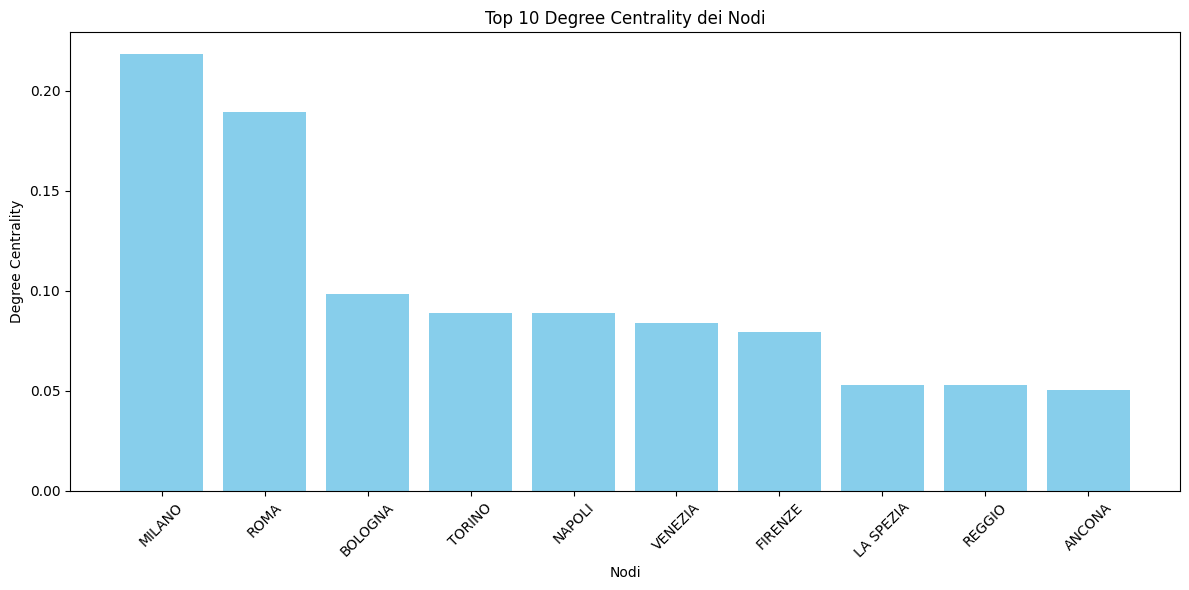

In [6]:
# Ordina i nodi per degree centrality e prendi i primi 10
top_nodes_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
nodes_degree = [node for node, _ in top_nodes_degree]
centrality_values_degree = [value for _, value in top_nodes_degree]

# Plot del grafico a istogramma
plt.figure(figsize=(12, 6))
plt.bar(nodes_degree, centrality_values_degree, color='skyblue')
plt.xlabel('Nodi')
plt.ylabel('Degree Centrality')
plt.title('Top 10 Degree Centrality dei Nodi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

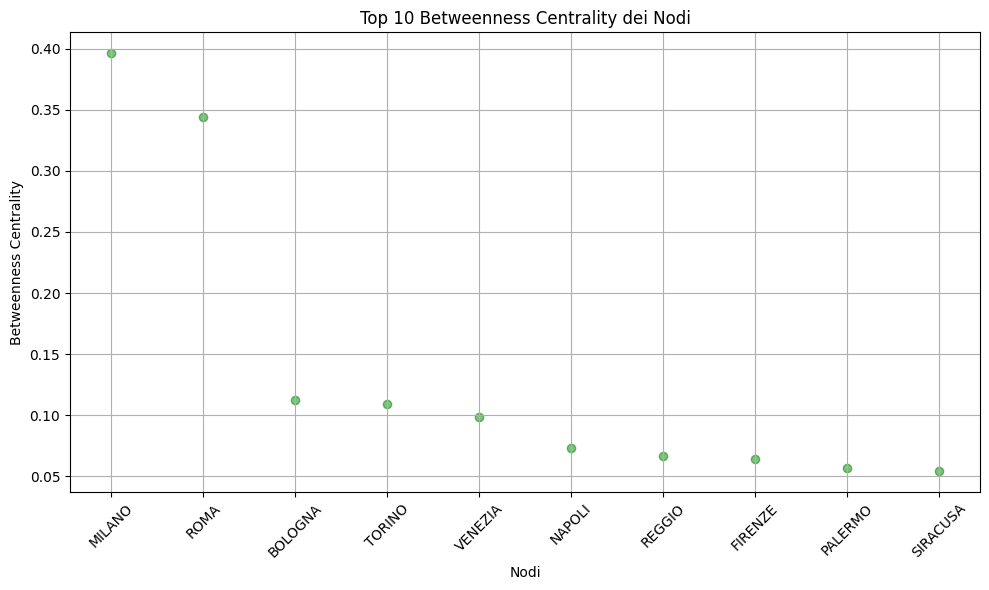

In [7]:
# Ordina i nodi per betweenness centrality e prendi i primi 10
top_nodes_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
nodes_betweenness = [node for node, _ in top_nodes_betweenness]
centrality_values_betweenness = [value for _, value in top_nodes_betweenness]

# Plot a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(nodes_betweenness, centrality_values_betweenness, color='green', alpha=0.5)
plt.xlabel('Nodi')
plt.ylabel('Betweenness Centrality')
plt.title('Top 10 Betweenness Centrality dei Nodi')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

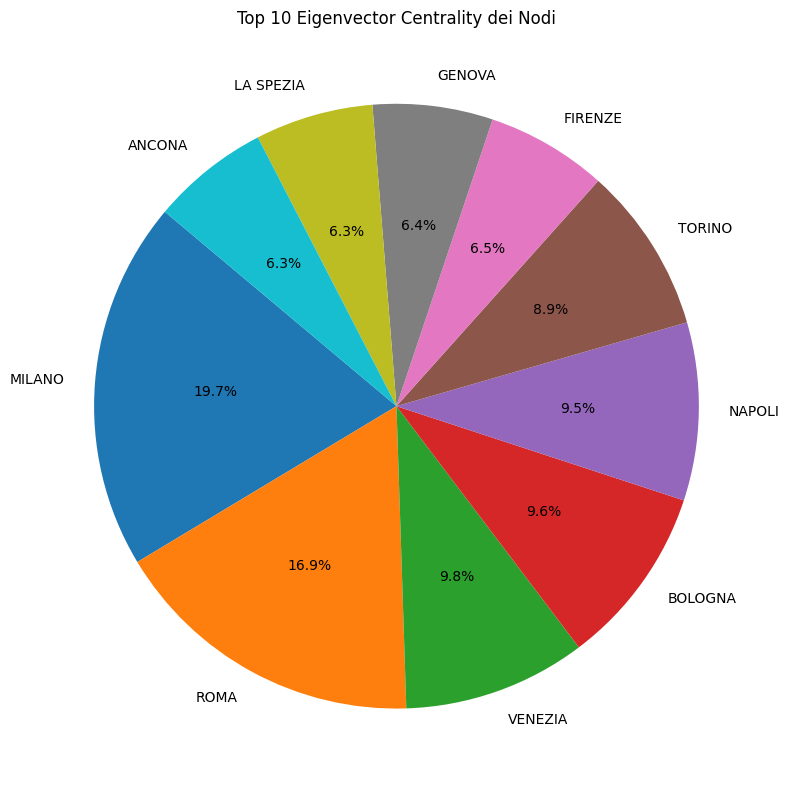

In [8]:
# Ordina i nodi per eigenvector centrality e prendi i primi 10
top_nodes_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
nodes_eigenvector = [node for node, _ in top_nodes_eigenvector]
centrality_values_eigenvector = [value for _, value in top_nodes_eigenvector]

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(centrality_values_eigenvector, labels=nodes_eigenvector, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Eigenvector Centrality dei Nodi')
plt.axis('equal')
plt.tight_layout()
plt.show()

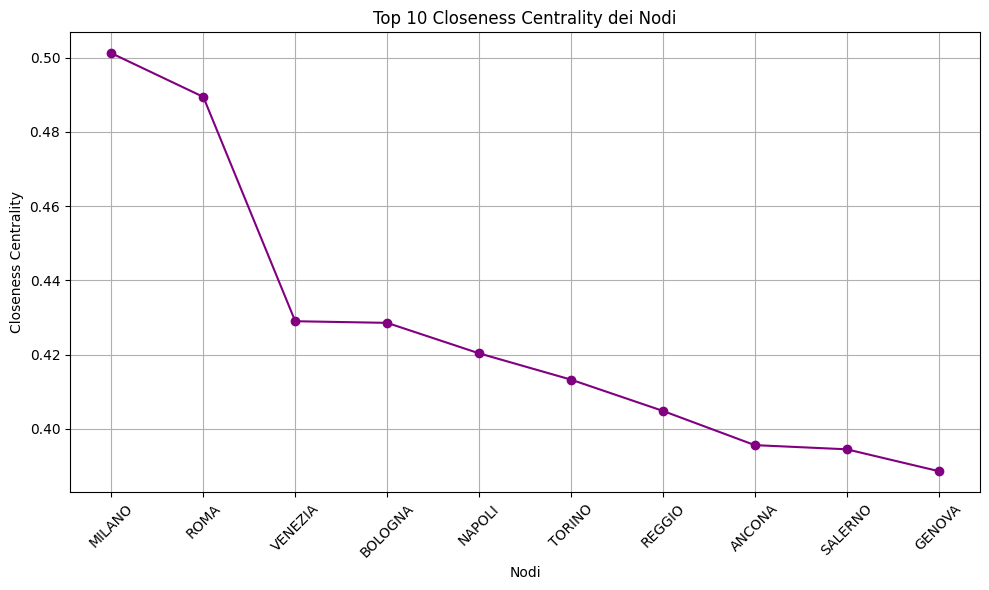

In [9]:
# Ordina i nodi per closeness centrality e prendi i primi 10
top_nodes_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
nodes_closeness = [node for node, _ in top_nodes_closeness]
centrality_values_closeness = [value for _, value in top_nodes_closeness]

# Plot a line chart
plt.figure(figsize=(10, 6))
plt.plot(nodes_closeness, centrality_values_closeness, marker='o', linestyle='-', color='purple')
plt.xlabel('Nodi')
plt.ylabel('Closeness Centrality')
plt.title('Top 10 Closeness Centrality dei Nodi')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# SIMULAZIONE E TESTING

In [90]:
lista_parole = ['Roma', 'Milano', 'Bologna', 'Torino', 'Napoli']

df1 = pd.read_csv('./dataset/treni_solo_citta.csv')
# Filtra il DataFrame rimuovendo le righe che contengono almeno una delle parole dalla lista
filtered_df1 = df1[~df1['stazPart'].str.contains('|'.join(lista_parole), case=False, na=False)]
refiltered_df = filtered_df1[~filtered_df1['stazArr'].str.contains('|'.join(lista_parole), case=False, na=False)]
# salva file per fare calcoli delle misurazioni nella sezione che segue
refiltered_df.to_csv('./dataset/simulazione/treni_solo_citta-.csv', index=False)

df2 = pd.read_csv('./dataset/merged_data.csv')
# Filtra il DataFrame rimuovendo le righe che contengono almeno una delle parole dalla lista
filtered_df2 = df2[~df2['citta_uniche'].str.contains('|'.join(lista_parole), case=False, na=False)]
# salva file per fare calcoli delle misurazioni nella sezione che segue
filtered_df2.to_csv('./dataset/simulazione/merged_data-.csv', index=False)


df3 = pd.read_csv('./dataset/lista_citta_con_stazione.csv')
# Filtra il DataFrame rimuovendo le righe che contengono almeno una delle parole dalla lista
filtered_df3 = df3[~df3['citta_uniche'].str.contains('|'.join(lista_parole), case=False, na=False)]
# salva file per fare calcoli delle misurazioni nella sezione che segue
filtered_df3.to_csv('./dataset/simulazione/lista_citta_con_stazione-.csv', index=False)

File CSV filtrato è stato creato con successo.
File CSV filtrato è stato creato con successo.


In [ ]:
df_citta = pd.read_csv('./dataset/simulazione/merged_data-.csv')
df_coppie = pd.read_csv('./dataset/simulazione/treni_solo_citta-.csv')

# Mappa delle città ai loro set di coordinate
citta_coord = {}
for idx, row in df_citta.iterrows():
    citta_coord[row['citta_uniche']] = (row['LAT'], row['LON'])

m = folium.Map(location=[41.8719, 12.5674], zoom_start=6, zoom_control=True, scrollWheelZoom=True)
geojson_data = './italy.geojson'

folium.GeoJson(
    geojson_data,
    style_function=lambda feature: {
        'color': 'black',
        'weight': 0.7
    }
).add_to(m)

# Funzione per aggiungere un arco tra le città di partenza e arrivo
def aggiungi_arco(mappa, citta_partenza, citta_arrivo):
    coord_partenza = citta_coord.get(citta_partenza)
    coord_arrivo = citta_coord.get(citta_arrivo)
    
    if coord_partenza and coord_arrivo:
        folium.PolyLine(
            locations=[coord_partenza, coord_arrivo],
            color='grey',
            weight=0.05,
            opacity=1  
        ).add_to(mappa)

for idx, row in df_citta.iterrows():
    folium.CircleMarker(
        location=[row['LAT'], row['LON']],
        radius=1,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7  
    ).add_to(m)

# Aggiungi gli archi 
for idx, row in df_coppie.iterrows():
    aggiungi_arco(m, row['stazPart'], row['stazArr'])

m

In [ ]:
df_citta = pd.read_csv('./dataset/simulazione/lista_citta_con_stazione-.csv')
df_coppie = pd.read_csv('./dataset/simulazione/treni_solo_citta-.csv')

# grafo2
G_2 = nx.Graph()

posizioni_usate = {}

# Aggiungi i nodi (città) al grafo con posizioni casuali non sovrapposte
for idx, row in df_citta.iterrows():
    while True:
        x = random.uniform(0, 1)  # Coordinate x casuali tra 0 e 1
        y = random.uniform(0, 1)  # Coordinate y casuali tra 0 e 1
        pos = (x, y)
        if pos not in posizioni_usate.values():
            posizioni_usate[row['citta_uniche']] = pos
            break
    G_2.add_node(row['citta_uniche'], pos=pos)

# Aggiungi gli archi (connessioni tra città di partenza e arrivo) al grafo
for idx, row in df_coppie.iterrows():
    G_2.add_edge(row['stazPart'], row['stazArr'])

G_2.remove_edges_from(nx.selfloop_edges(G_2))

# Calcolo delle misurazioni di centralità e altre metriche
degree_centrality = nx.degree_centrality(G_2)
betweenness_centrality = nx.betweenness_centrality(G_2)
eigenvector_centrality = nx.eigenvector_centrality(G_2, max_iter=1000)
closeness_centrality = nx.closeness_centrality(G_2)
clustering_coefficient = nx.clustering(G_2)
density = nx.density(G_2)

if nx.is_connected(G_2):
    avg_path_length = nx.average_shortest_path_length(G_2)
    diameter = nx.diameter(G_2)
else:
    avg_path_length = None
    diameter = None

connected_components = list(nx.connected_components(G_2))
connectedness = len(connected_components)

core_number = nx.core_number(G_2)
assortativity = nx.degree_assortativity_coefficient(G_2)
bridges = list(nx.bridges(G_2))

# Stampa delle metriche
print("Degree Centrality:", degree_centrality)
print("Betweenness Centrality:", betweenness_centrality)
print("Eigenvector Centrality:", eigenvector_centrality)
print("Closeness Centrality:", closeness_centrality)
print("Clustering Coefficient:", clustering_coefficient)
print("Density:", density)
print("Number of Connected Components:", connectedness)
print("Core Numbers:", core_number)
print("Assortativity:", assortativity)
print("Bridges:", bridges)

In [ ]:
# Calcola la degree centrality per ogni nodo
degree_centrality_2 = nx.degree_centrality(G_2)

# Ordina i nodi per degree centrality e prendi i primi 10
top_nodes_degree = sorted(degree_centrality_2.items(), key=lambda x: x[1], reverse=True)[:10]
nodes_degree = [node for node, _ in top_nodes_degree]
centrality_values_degree = [value for _, value in top_nodes_degree]

# Plot a bar chart
plt.figure(figsize=(12, 6))
plt.bar(nodes_degree, centrality_values_degree, color='skyblue')
plt.xlabel('Nodi')
plt.ylabel('Degree Centrality')
plt.title('Top 10 Degree Centrality dei Nodi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Calcola la betweenness centrality per ogni nodo
betweenness_centrality_2 = nx.betweenness_centrality(G_2)

# Ordina i nodi per betweenness centrality e prendi i primi 10
top_nodes_betweenness = sorted(betweenness_centrality_2.items(), key=lambda x: x[1], reverse=True)[:10]
nodes_betweenness = [node for node, _ in top_nodes_betweenness]
centrality_values_betweenness = [value for _, value in top_nodes_betweenness]

# Plot a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(nodes_betweenness, centrality_values_betweenness, color='green', alpha=0.5)
plt.xlabel('Nodi')
plt.ylabel('Betweenness Centrality')
plt.title('Top 10 Betweenness Centrality dei Nodi')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Calcola la eigenvector centrality per ogni nodo
eigenvector_centrality_2 = nx.eigenvector_centrality(G_2, max_iter=1000)

# Ordina i nodi per eigenvector centrality e prendi i primi 10
top_nodes_eigenvector = sorted(eigenvector_centrality_2.items(), key=lambda x: x[1], reverse=True)[:10]
nodes_eigenvector = [node for node, _ in top_nodes_eigenvector]
centrality_values_eigenvector = [value for _, value in top_nodes_eigenvector]

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(centrality_values_eigenvector, labels=nodes_eigenvector, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Eigenvector Centrality dei Nodi')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
# Calcola la closeness centrality per ogni nodo
closeness_centrality_2 = nx.closeness_centrality(G_2)

# Ordina i nodi per closeness centrality e prendi i primi 10
top_nodes_closeness = sorted(closeness_centrality_2.items(), key=lambda x: x[1], reverse=True)[:10]
nodes_closeness = [node for node, _ in top_nodes_closeness]
centrality_values_closeness = [value for _, value in top_nodes_closeness]

# Plot a line chart
plt.figure(figsize=(10, 6))
plt.plot(nodes_closeness, centrality_values_closeness, marker='o', linestyle='-', color='purple')
plt.xlabel('Nodi')
plt.ylabel('Closeness Centrality')
plt.title('Top 10 Closeness Centrality dei Nodi')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# TODO CHECKLIST

- capire bene i risultati
- migliorare la mappa dell'italia, in particolar modo gli archi (confido in te super franci debuggatore)
- aggiungere grafici (istogrammi)